Imports

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Задание 1

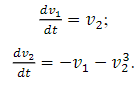

In [4]:
matr = np.array(
    [
        [0, 1],
        [-1, 0]
    ]
)
matr

array([[ 0,  1],
       [-1,  0]])

Собстеннве значения 

In [5]:
eig = np.linalg.eig(matr)
eig[0]

array([0.+1.j, 0.-1.j])

Модуляция

In [6]:
def ode(y, t, с):
    v_1, v_2 = y
    dv_1 = v_2
    dv_2 = -v_1 - v_2**3
    return [dv_1, dv_2]

In [7]:
def calcODE(args, y0, dy0, ts = 10, nt = 101): 
    y0 = [y0, dy0] 
    t = np.linspace(0, ts, nt) 
    sol = odeint(ode, y0, t, args) 
    return sol

In [8]:
def drawPhasePortrait(
        args, 
        deltaX = 1, 
        deltaDX = 1, 
        startX = 0,  
        stopX = 5, 
        startDX = 0, 
        stopDX = 5, 
        ts = 10, 
        nt = 101
    ): 
    for y0 in range(startX, stopX, deltaX): 
            for dy0 in range(startDX, stopDX, deltaDX): 
                sol = calcODE(args, y0, dy0, ts, nt) 
                plt.plot(sol[:, 0], sol[:, 1], 'b') 
    plt.xlabel('x') 
    plt.ylabel('dx/dt') 
    plt.grid() 
    plt.show()

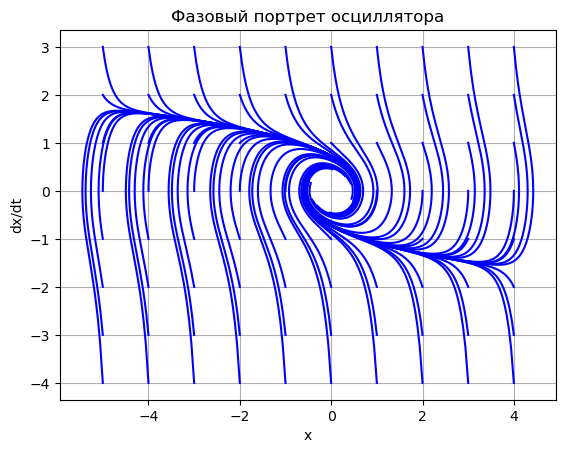

In [9]:
c = 2 # Параметр ОДУ (длина маятника)  
args=(c, ) 
plt.title('Фазовый портрет осциллятора')
drawPhasePortrait(args,  1,  1,  -5,  5,  -4,  4,  ts  =  5,  nt  = 
301)

In [48]:
f = 2.0

In [49]:
def ode(z, t):
    z1, z2, z3 = z
    u = z1
    du = f - u**2
    dz1 = z2
    dz2 = z3
    dz3 = (2 - du)**2 - du - 3 * (dz1 + dz2)
    return [dz1, dz2, dz3]

Положение равновесия

In [44]:
a, b, c = 1, 1, -f
roots = np.roots([a, b, c])
equilibriums = [(r, 0, 0) for r in roots.real if np.isreal(r)]
equilibriums

[(-2.0, 0, 0), (1.0, 0, 0)]

Линеризация

In [45]:
z1_eq = roots[0].real
z2_eq = 0
z3_eq = 0
u_eq = z1_eq

In [85]:
def jacobian_matrix(z1, z2, z3):
    return np.array([
        [0, 1, 0],
        [0, 0, 1],
        [2*z1 + 2, -1, -3]
    ])


Точка 1 (-2.0, 0, 0):
λ1 = -2.893+0.000j (Re=-2.893)
λ2 = -0.053+0.830j (Re=-0.053)
λ3 = -0.053-0.830j (Re=-0.053)

Точка 2 (1.0, 0, 0):
λ1 = 0.893+0.000j (Re=0.893)
λ2 = -1.947+0.830j (Re=-1.947)
λ3 = -1.947-0.830j (Re=-1.947)


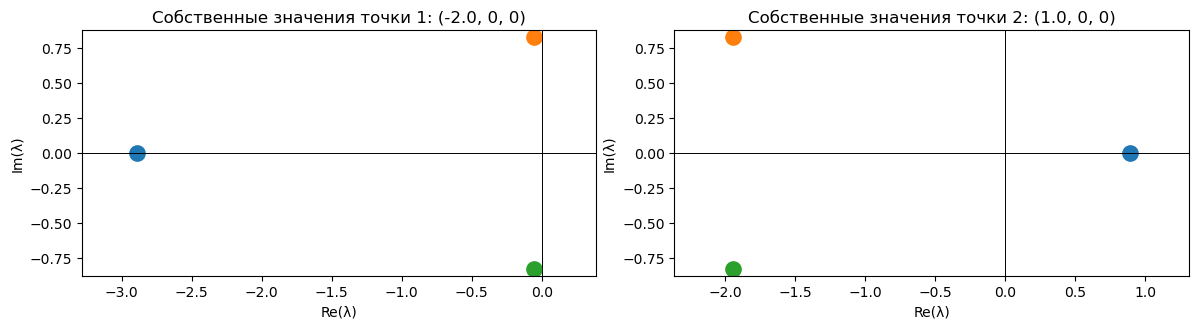

In [88]:
plt.figure(figsize=(12, 6))
for i, point in enumerate(equilibriums):
    A = jacobian_matrix(*point)
    eigenvalues = np.linalg.eig(A)[0]

    plt.subplot(2, len(equilibriums), i + 1)
    for val in eigenvalues:
        plt.plot(np.real(val), np.imag(val), 'o', markersize=10, mew=2)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.axhline(0, color='black', linewidth=0.5)
    plt.title(f'Собственные значения точки {i+1}: {point}')
    plt.xlabel('Re(λ)')
    plt.ylabel('Im(λ)')
    plt.axis('equal')

    print(f"\nТочка {i+1} {point}:")
    for j, val in enumerate(eigenvalues):
        print(f'λ{j+1} = {val:.3f} (Re={val.real:.3f})')

plt.tight_layout()
plt.show()

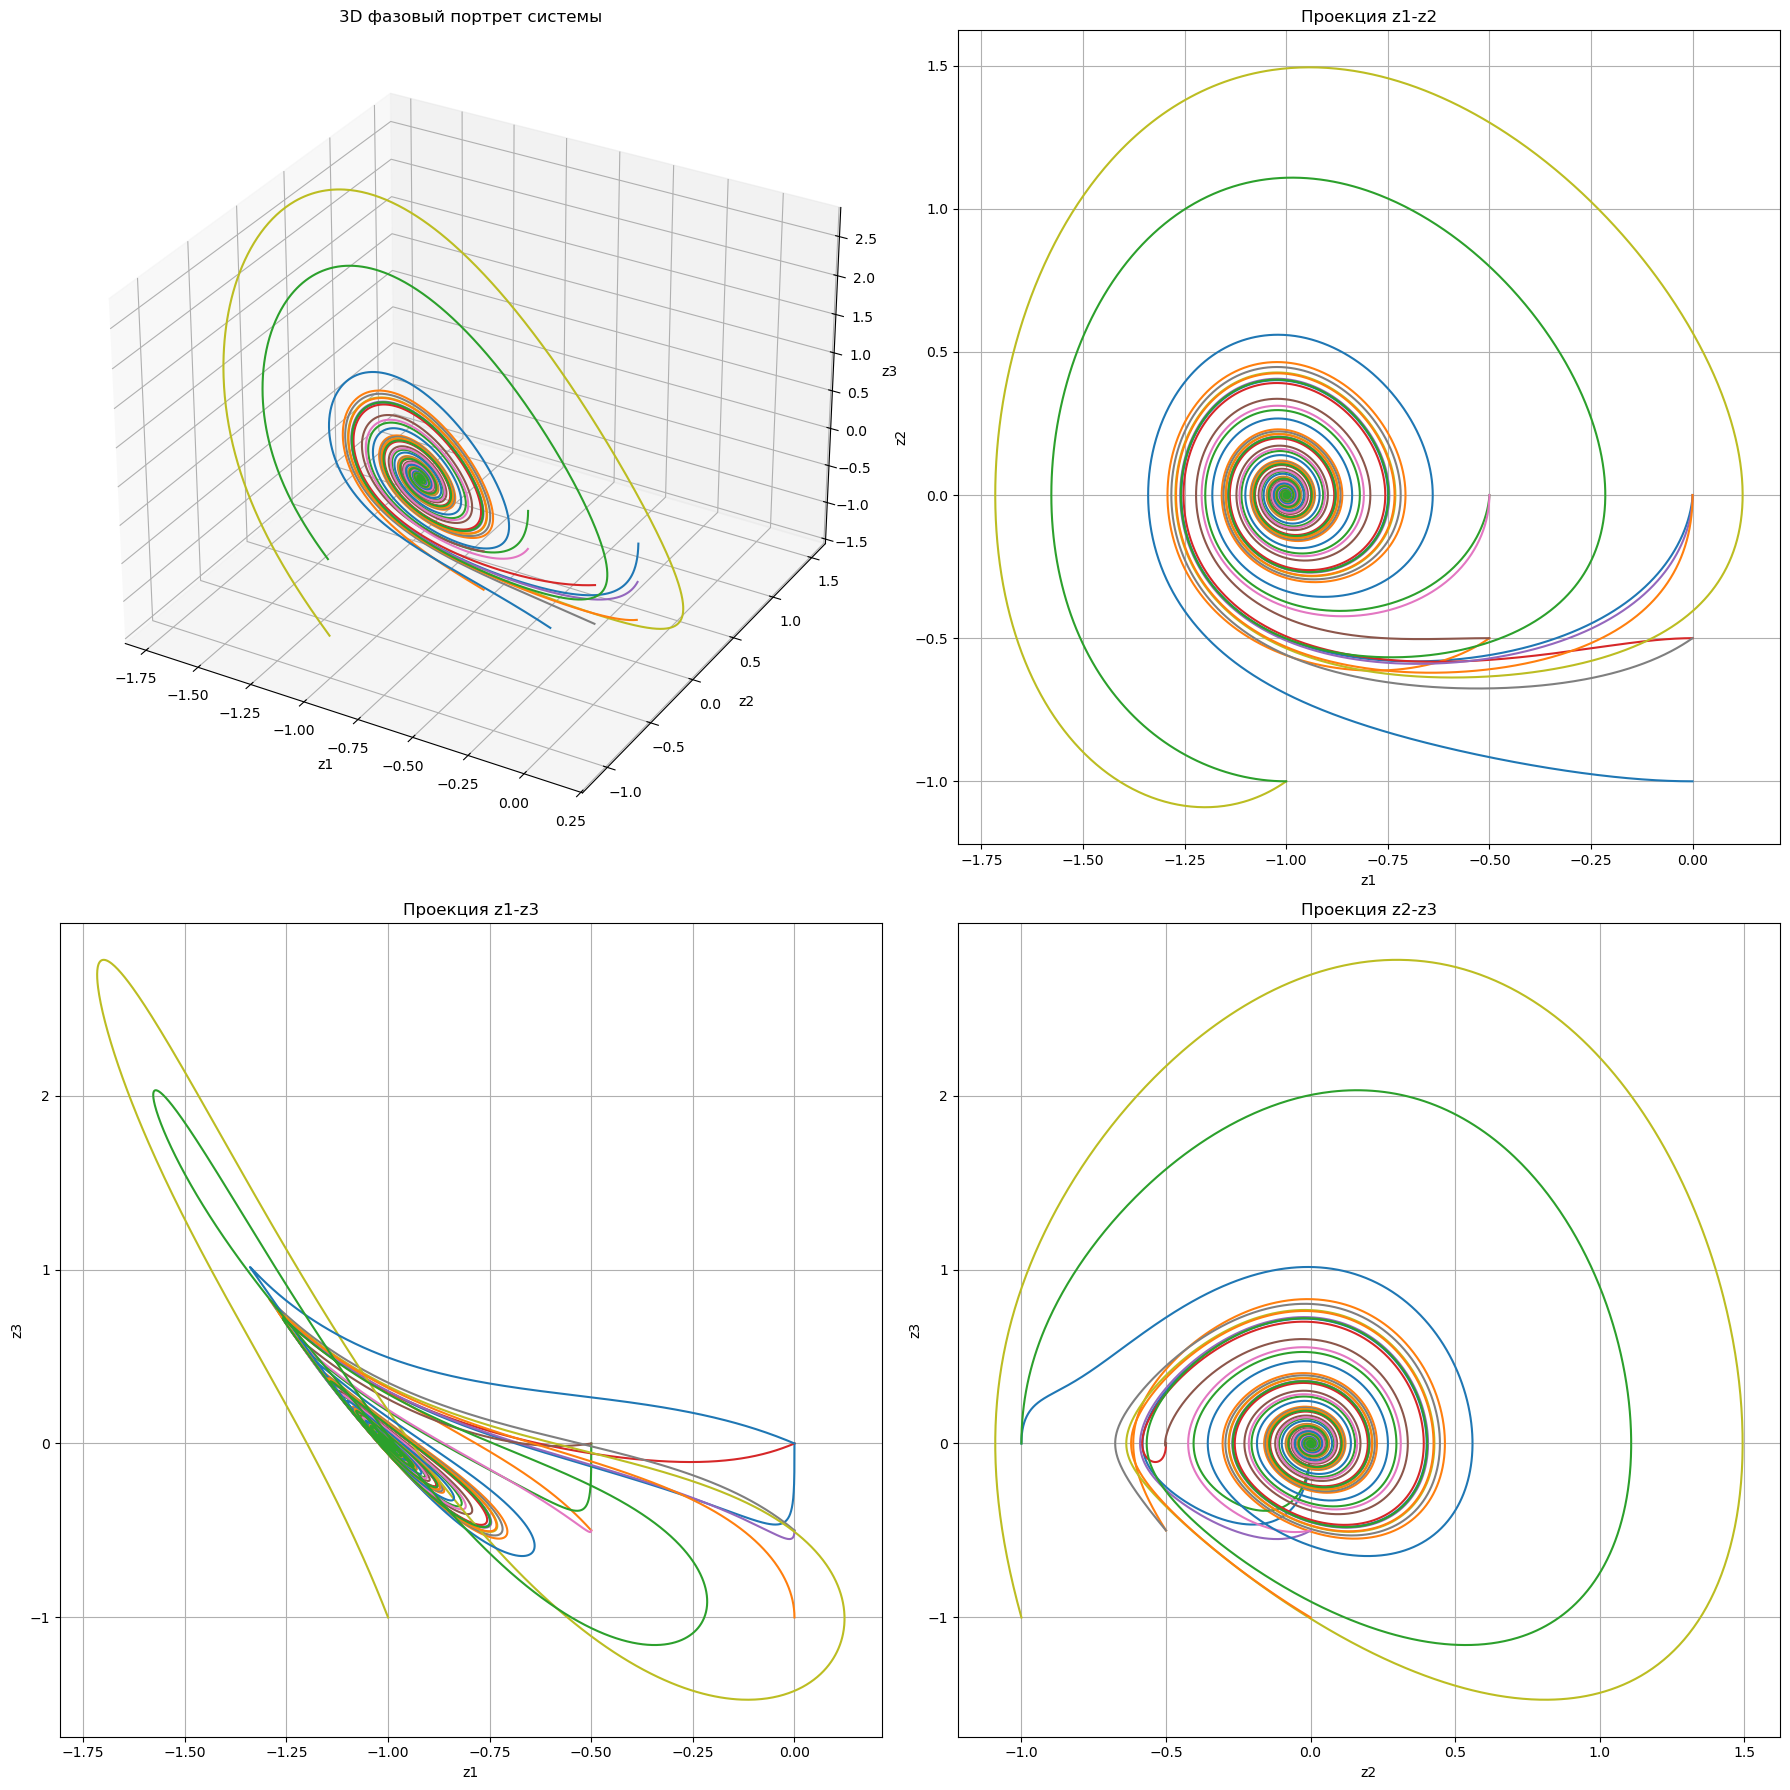

In [83]:
t = np.linspace(0, 100, 20000)

initial_conditions = [
    [0, 0, 0],
    [-0.5, -0.5, -0.5],
    [-0.5, 0, 0],
    [0, -0.5, 0],
    [0, 0, -0.5],
    [-0.5, -0.5, 0],
    [-0.5, 0, -0.5],
    [0, -0.5, -0.5],
    [-1, -1, -1],
    [-1, 0, 0],
    [0, -1, 0],
    [0, 0, -1],
    [-1, -1, 0]
]

fig2 = plt.figure(figsize=(18, 18))
ax3d = fig2.add_subplot(2, 2, 1, projection='3d')

for z0 in initial_conditions:
    sol = odeint(ode, z0, t)
    # 3D траектория
    ax3d.plot(sol[:, 0], sol[:, 1], sol[:, 2], label=f'init: {z0}')
    
# 3 проекции
ax1 = fig2.add_subplot(2, 2, 2)
ax2 = fig2.add_subplot(2, 2, 3)
ax3 = fig2.add_subplot(2, 2, 4)

for z0 in initial_conditions:
    sol = odeint(ode, z0, t)
    ax1.plot(sol[:, 0], sol[:, 1])
    ax2.plot(sol[:, 0], sol[:, 2])
    ax3.plot(sol[:, 1], sol[:, 2])

ax3d.set_xlabel('z1')
ax3d.set_ylabel('z2')
ax3d.set_zlabel('z3')
ax3d.set_title('3D фазовый портрет системы')
ax3d.grid()

ax1.set_xlabel('z1')
ax1.set_ylabel('z2')
ax1.set_title('Проекция z1-z2')
ax1.grid()

ax2.set_xlabel('z1')
ax2.set_ylabel('z3')
ax2.set_title('Проекция z1-z3')
ax2.grid()

ax3.set_xlabel('z2')
ax3.set_ylabel('z3')
ax3.set_title('Проекция z2-z3')
ax3.grid()

plt.tight_layout()
plt.show()


